# Advection equation

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("nbagg")
from matplotlib import gridspec 

In [ ]:
# Parameters
eps=0.9
c0=2000
xmax=10000
nx=1250
x=np.linspace(0,xmax,nx)
dx=x[1]-x[0]

tmax=3 #simulation time
dt=dx*eps/c0
nt=int(tmax/dt)
# initial conditon and initialisation 

sig=100
x0=1000    #source factor
sx = np.exp(-1.0 / sig ** 2.0 * (x - x0) ** 2.0); 







## Run this cell before running any one of the method 

<IPython.core.display.Javascript object>


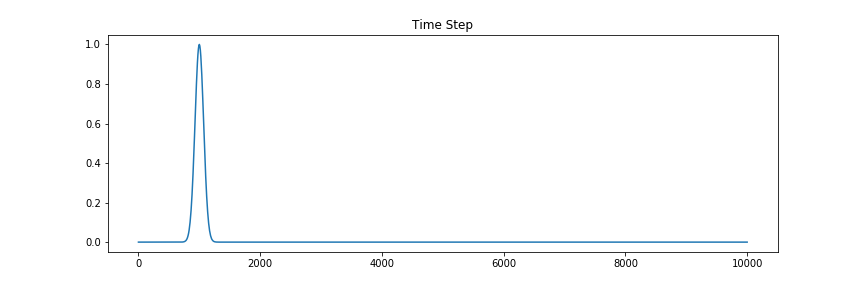

Text(0.5, 1.0, 'Time Step')

In [83]:
unew=np.zeros(nx)
du=np.zeros(nx)

u=sx
#c=np.zeros(nx)
#c=c+c0


fig1=plt.figure(figsize=[12,4])
gsp=gridspec.GridSpec(1,1)
ax=plt.subplot(gsp[0])
up,=ax.plot(x,u)
ax.set_title("Time Step")


## Euler Method

In [74]:
for it in range(nt):
    
    for i in range(1,nx-1):
        du[i]=(u[i]-u[i-1])/(dx)
    unew=u-dt*c0*du
    u=unew
    
    idisp = 5 # display frequency
    if (it % idisp) == 0:
        ax.set_title('Time Step (nt) = %d' % it)
        up.set_ydata(u)
        plt.gcf().canvas.draw()
            

##  Predictor Corrector Method 

In [72]:
k1=np.zeros(nx)
k2=np.zeros(nx)
q=np.zeros(nx)
for it in range(nt):
    
    for i in range(1,nx-1):
        du[i]=(u[i]-u[i-1])/(dx)
    k1=c0*du
    q=u-dt*k1
    
    for i in range(1,nx-1):
        du[i]=(q[i+1]-q[i])/(dx)    
    
    k2=c0*du
    
    unew=u-dt*(k1+k2)/2
    u = unew
    idisp = 10 # display frequency
    if (it % idisp) == 0:
        ax.set_title('Time Step (nt) = %d' % it)
        up.set_ydata(u)
        plt.gcf().canvas.draw()
            

## Lax Wendroff Scheme 

In [82]:

q=np.zeros(nx)
for it in range(nt):
    
    for i in range(1,nx-1):
        du[i]=(u[i+1]-u[i-1])/(2*dx)
        q[i]=dt**2/(2.0*dx**2)*c0**2*(u[i+1]-2.*u[i]+u[i-1])
    
    unew=u-dt*c0*du+q
    
    
    u = unew
    idisp = 10 # display frequency
    if (it % idisp) == 0:
        ax.set_title('Time Step (nt) = %d' % it)
        up.set_ydata(u)
        plt.gcf().canvas.draw()
            